## 0. Car sales in Norway - emissions and trends

Go to [kaggle and download this dataset](https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway/data). In this exercise we'll work with `norway_new_car_sales_by_month.csv`

&nbsp; a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

&nbsp; b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

&nbsp; c) Draw a line chart of average CO2 emissions for same years that as in b)

&nbsp; d) Draw a line chart of all years and months for import

&nbsp; e) Draw a line chart of all years and months for average CO2 emissions

&nbsp; f) Draw a line chart of all years and months for electric cars import where it's relevant.

&nbsp; g) Draw a line chart of average diesel share per year

&nbsp; h) Discuss some findings with a friend based on this dataset, and do plot more graphs

In [101]:
import pandas as pd

df = pd.read_csv("../../data/norway_new_car_sales_by_month.csv")
df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [103]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [104]:
df.describe()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,61.000000,49.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,73.000000,73.000000,53.000000
mean,2011.545455,6.454545,11134.297521,392.586777,2204.371901,-135.049587,36864.737705,973.122449,129.520661,133.735537,141.396694,6582.355372,60.512397,62.278512,1255.219178,1154.109589,306.924528
std,2.915476,3.488075,1752.046397,1789.539953,573.127896,545.395787,4230.548664,2728.915662,22.719338,17.094233,10.847795,1596.675812,15.802049,13.128647,1059.443502,875.792142,165.086906
min,2007.000000,1.000000,5353.000000,-4548.000000,1048.000000,-1810.000000,24106.000000,-6261.000000,84.000000,94.000000,118.000000,3422.000000,26.300000,38.000000,159.000000,43.000000,33.000000
25%,2009.000000,3.000000,10250.000000,-526.000000,1812.000000,-495.000000,34212.000000,-392.000000,110.000000,120.000000,133.000000,5434.000000,48.500000,49.400000,443.000000,309.000000,197.000000
50%,2012.000000,6.000000,11385.000000,493.000000,2263.000000,-114.000000,37079.000000,855.000000,132.000000,131.000000,136.000000,6583.000000,68.700000,68.700000,899.000000,1260.000000,286.000000
75%,2014.000000,9.000000,12337.000000,1445.000000,2625.000000,162.000000,39797.000000,2708.000000,151.000000,150.000000,151.000000,7808.000000,73.700000,74.000000,1556.000000,1906.000000,433.000000
max,2017.000000,12.000000,14207.000000,5227.000000,3768.000000,1334.000000,44106.000000,5896.000000,162.000000,165.000000,166.000000,10072.000000,81.400000,81.400000,4419.000000,3391.000000,746.000000


In [105]:
df["Year"].value_counts()

Year
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017     1
Name: count, dtype: int64

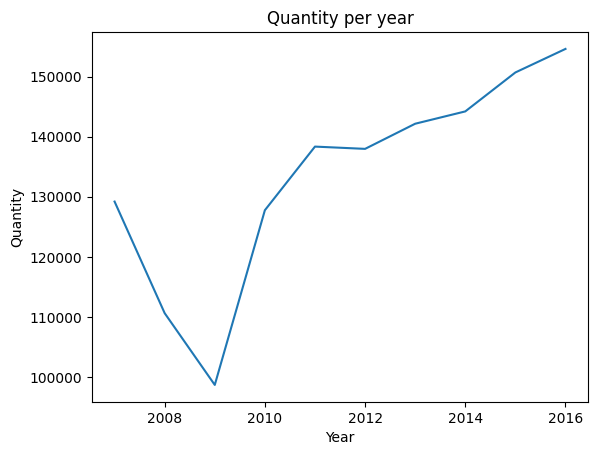

In [106]:
# b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

# year 2017 should be skipped, since it only has 1 month availiable
quantity_per_year = df.query("Year < 2017")
quantity_per_year["Year"].value_counts()
quantity_per_year = quantity_per_year.groupby("Year")["Quantity"].sum()
ax = quantity_per_year.plot(x="Year", y="Quantity")
ax.set(xlabel="Year", ylabel="Quantity", title="Quantity per year")
fig = ax.get_figure()
fig.savefig("quantity_per_year.png")

In [107]:
quantity_per_year

Year
2007    129195
2008    110617
2009     98675
2010    127754
2011    138345
2012    137967
2013    142151
2014    144202
2015    150686
2016    154603
Name: Quantity, dtype: int64

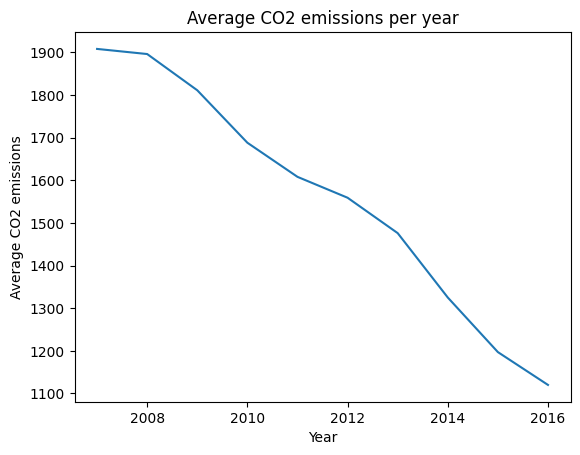

In [108]:
# c) Draw a line chart of average CO2 emissions for same years that as in b)
co2_per_year = df.query("Year < 2017")
co2_per_year = co2_per_year.groupby("Year")["Avg_CO2"].sum()
ax = co2_per_year.plot(x="Year", y="Avg_CO2")
ax.set(xlabel="Year", ylabel="Average CO2 emissions", title="Average CO2 emissions per year")
fig = ax.get_figure()
fig.savefig("avg_co2_emissions_per_year.png")

In [109]:
df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


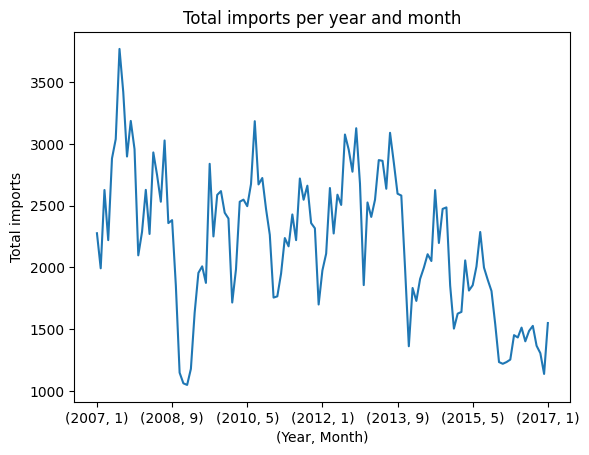

In [110]:
# d) Draw a line chart of all years and months for import
imports = df.groupby(["Year", "Month"])["Import"].sum()

ax = imports.plot(x=["Year", "Month"], y="Import")
ax.set(xlabel="(Year, Month)", ylabel="Total imports", title="Total imports per year and month")
fig = ax.get_figure()
fig.savefig("imports.png")

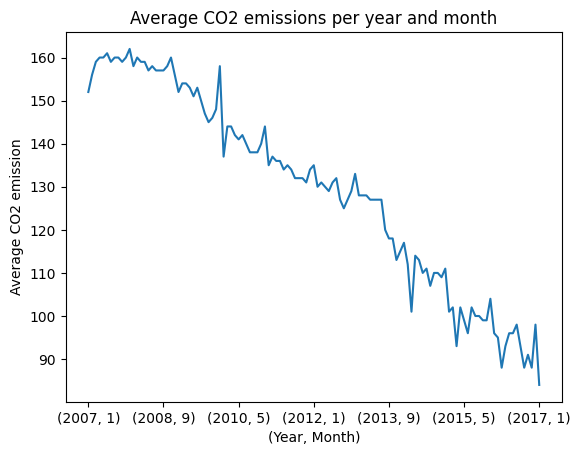

In [111]:
# e) Draw a line chart of all years and months for average CO2 emissions
co2_emissions = df.groupby(["Year", "Month"])["Avg_CO2"].sum()
ax = co2_emissions.plot(x=["Year", "Month"], y="Avg_CO2")
ax.set(xlabel="(Year, Month)", ylabel="Average CO2 emission", title="Average CO2 emissions per year and month")
fig = ax.get_figure()
fig.savefig("co2_emissions.png")

In [112]:
df.describe()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,61.000000,49.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,73.000000,73.000000,53.000000
mean,2011.545455,6.454545,11134.297521,392.586777,2204.371901,-135.049587,36864.737705,973.122449,129.520661,133.735537,141.396694,6582.355372,60.512397,62.278512,1255.219178,1154.109589,306.924528
std,2.915476,3.488075,1752.046397,1789.539953,573.127896,545.395787,4230.548664,2728.915662,22.719338,17.094233,10.847795,1596.675812,15.802049,13.128647,1059.443502,875.792142,165.086906
min,2007.000000,1.000000,5353.000000,-4548.000000,1048.000000,-1810.000000,24106.000000,-6261.000000,84.000000,94.000000,118.000000,3422.000000,26.300000,38.000000,159.000000,43.000000,33.000000
25%,2009.000000,3.000000,10250.000000,-526.000000,1812.000000,-495.000000,34212.000000,-392.000000,110.000000,120.000000,133.000000,5434.000000,48.500000,49.400000,443.000000,309.000000,197.000000
50%,2012.000000,6.000000,11385.000000,493.000000,2263.000000,-114.000000,37079.000000,855.000000,132.000000,131.000000,136.000000,6583.000000,68.700000,68.700000,899.000000,1260.000000,286.000000
75%,2014.000000,9.000000,12337.000000,1445.000000,2625.000000,162.000000,39797.000000,2708.000000,151.000000,150.000000,151.000000,7808.000000,73.700000,74.000000,1556.000000,1906.000000,433.000000
max,2017.000000,12.000000,14207.000000,5227.000000,3768.000000,1334.000000,44106.000000,5896.000000,162.000000,165.000000,166.000000,10072.000000,81.400000,81.400000,4419.000000,3391.000000,746.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

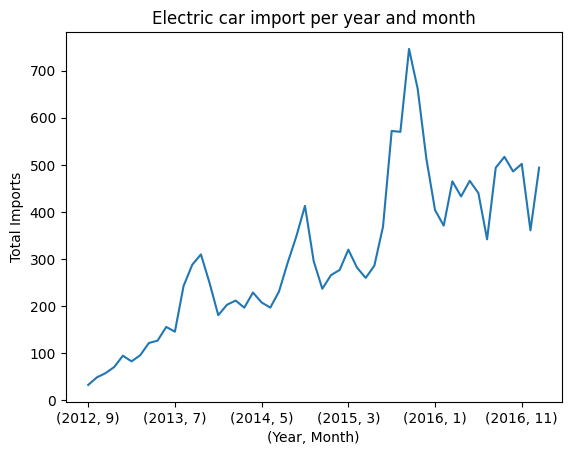

In [114]:
# f) Draw a line chart of all years and months for electric cars import where it's relevant.
electric_car_imports = df[df["Import_Electric"] > 0]
electric_car_imports = electric_car_imports.groupby(["Year", "Month"])["Import_Electric"].sum()
ax = electric_car_imports.plot(x=["Year", "Month"], y="Import_Electric")
ax.set(xlabel="(Year, Month)", ylabel="Total Imports", title="Electric car import per year and month")
fig = ax.get_figure()
fig.savefig("electric_car_imports.png")

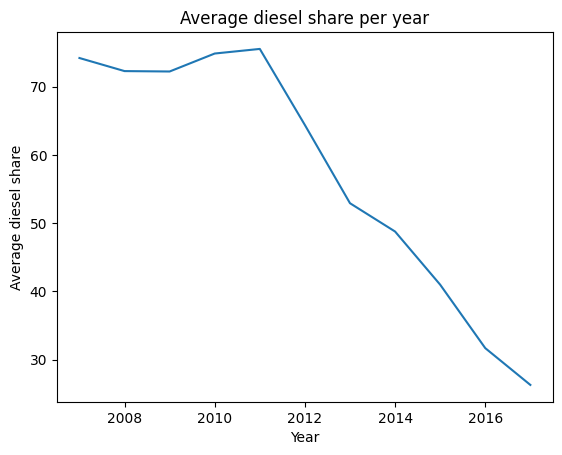

In [115]:
# g) Draw a line chart of average diesel share per year
avg_diesel = df.groupby("Year")["Diesel_Share"].mean()
ax = avg_diesel.plot(x="Year", y="Diesel_Share")
ax.set(xlabel="Year", ylabel="Average diesel share", title="Average diesel share per year")
fig = ax.get_figure()
fig.savefig("avg_diesel.png")

In [116]:
# h) Discuss some findings with a friend based on this dataset, and do plot more graphs